<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/Module_1_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Experiment with different transformation matrices and check the accuracy


Data in T0 =  [45 15]
Data in T1 =  [45 30]
[45 15]
[45 15]
Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


<ipython-input-20-6c2ca4067be0>:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  transform = transform.astype(np.float)


Baseline accuracy =  0.7619047619047619
[[ 0.5 -0.5]
 [ 0.   2.5]]
Accuracy after transform =  0.8095238095238095


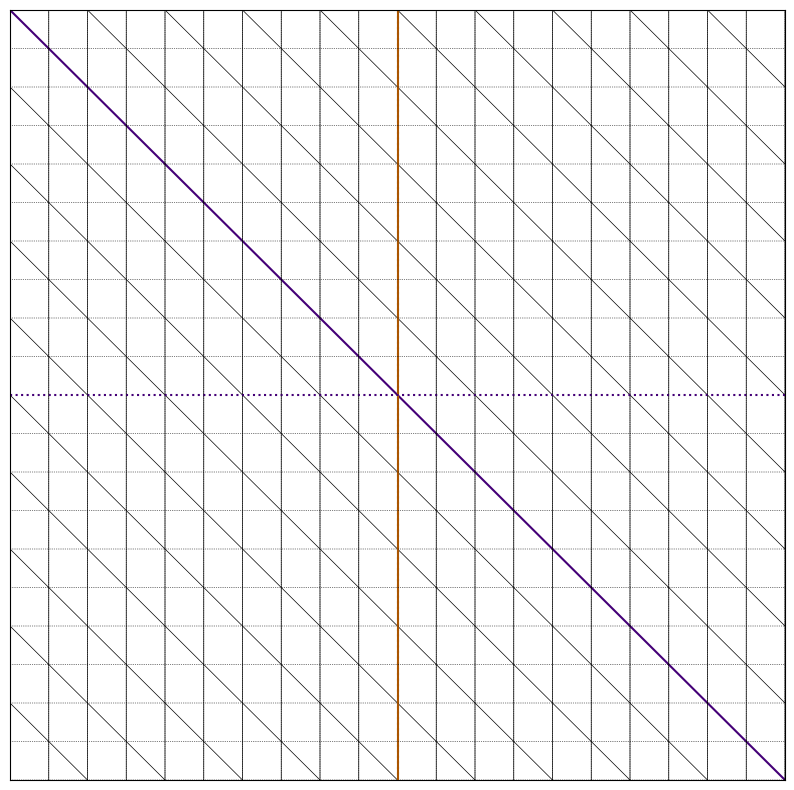

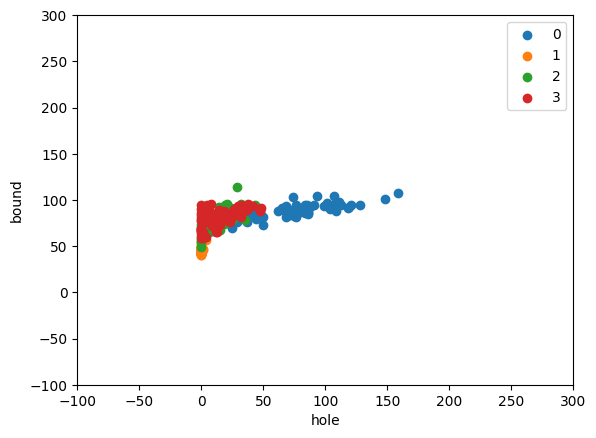

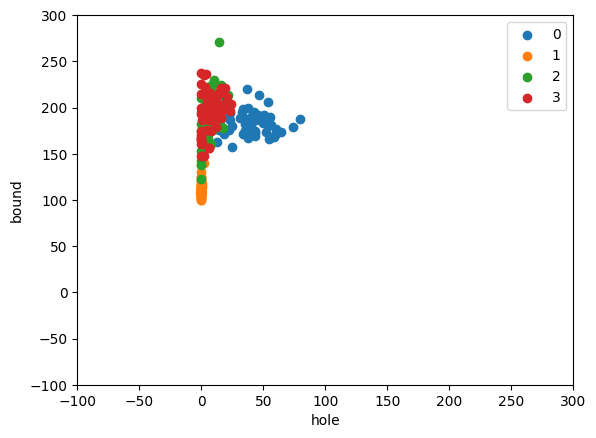

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

T0 = np.array([[1,0],[0,1]])
T1 = np.array([[1,0], [-1,2]])

data1 = np.array([45,30]) # the data in T1 coordinate system
data0 = np.matmul(T1, data1) # the data in T0 coordinate system

print('Data in T0 = ', data0)
print('Data in T1 = ', data1)

#@title

from IPython.display import Latex as lt
#Plotting functions
#(You DON'T need to understand how these functions)

# function to plot a grid
def plotGrid(transform, unit, linestyle = ':', fig=None, ax=None):
  lim1 = -100
  lim2 = 100
  def mat2xy(start, end):
    if len(start.shape)==1:
      start = np.expand_dims(start,0)
      end = np.expand_dims(end,0)
    nan = np.ones(len(start))*np.nan
    x = np.stack((start[:,0], end[:,0], nan)).T.reshape(-1)
    y = np.stack((start[:,1], end[:,1], nan)).T.reshape(-1)
    return x, y

  def parallellines(axis, addend, lines, unit):
    addend = np.repeat(np.expand_dims(addend,0), lines*2, 0)
    unit = np.expand_dims(np.arange(-lines, lines)*unit,1)
    unit = unit-lines
    addend = addend*unit
    lines = np.expand_dims(axis,0) + addend
    return np.concatenate((lines, lines*-1))

  if fig is None:
    fig, ax = plt.subplots(figsize=(10,10))
  transform = transform.astype(np.float)
  xaxis = transform[0]
  yaxis = transform[1]

  # plot lines parallel to the x axis
  lines1= parallellines(xaxis*lim1, yaxis, 100,unit )
  lines2 = parallellines(xaxis*lim2, yaxis, 100,unit )
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot x axis
  x,y = mat2xy(xaxis*lim1, xaxis*lim2)
  plt.plot(x,y,linestyle, color = '#440077')

  # plot  lines parallel to the y axis
  lines1= parallellines(yaxis*lim1, xaxis, 100,unit)
  lines2 = parallellines(yaxis*lim2, xaxis, 100,unit)
  x,y = mat2xy(lines1, lines2)
  plt.plot(x,y, linestyle+'k', linewidth=0.5)
  # plot y axis
  x,y = mat2xy(yaxis*lim1, yaxis*lim2)
  plt.plot(x,y,linestyle, color= '#aa5500')

  return fig, ax

def plotData(X, y, xlabel = 'hole', ylabel = 'bound', fig=None, ax = None):

  if fig is None:
    fig, ax = plt.subplots()
  for ii in range(nclasses):
    plt.scatter(X[y==ii,0], X[y==ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max()
  lim1 = X.min()
  add = abs(lim1-lim2)/5
  return fig, ax


fig, ax = plotGrid(T1.T, 1,'-') # custom plotting function, no need to understand this
plotGrid(T0.T, 1, fig=fig, ax=ax) # custom plotting function, no need to understand this
plt.scatter(data0[0], data0[1])
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xticks([]);
ax.set_yticks([]);

data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

# let us define 3 points in T1
A1 = np.array([3,3])
B1 = np.array([2,-5])
C1 = np.array([1,-1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

# function to calculate Euclidean distance:
def dist(a, b):
  diff = a-b
  sq = diff*diff
  return np.sqrt(sq.sum())

# distance between the points in T1
print('Distance between A and B in T1 = ', dist(A1, B1))
print('Distance between B and C in T1 = ', dist(B1, C1))
print('Distance between A and C in T1 = ', dist(A1, C1))

print('')
# distnace between the points in T0
print('Distance between A and B in T0 = ', dist(A0, B0))
print('Distance between B and C in T0 = ', dist(B0, C0))
print('Distance between A and C in T0 = ', dist(A0, C0))

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y<nclasses]
train_y = train_y[train_y<nclasses]
test_X = test_X[test_y<nclasses]
test_y = test_y[test_y<nclasses]

train_X = train_X[::100].copy() # We are only taking a subset of the training set
train_y = train_y[::100].copy() # do the same to the labels
test_X = test_X[::100].copy() # taking a subset of the test set. This code takes every 500th sample
test_y = test_y[::100].copy()

#@title

def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary




# get all the features
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1,2))/(28*28)
# test_sum = np.sum(test_X, (1,2))/(28*28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack((train_hole,train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

# fix limits of x and y axis so that we can see what is going on
xlim=[-100,300]
ylim=[-100,300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print('Baseline accuracy = ', acc)

transform = np.array([[0.5,-0.5],[0,2.5]])

train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)  # whatever transform we are applying to the training set should be applied to the test set also

print(transform)

fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print('Accuracy after transform = ', acc)

2. Will the same transform used for these two features also work for other features?



*   The transform you applied to the features train_feats and test_feats in this code snippet is defined as transform = np.array([[0.5,-0.5],[0,2.5]]). This transformation is a linear transformation that scales and shears the feature space along the two dimensions. Specifically, it scales the first dimension (hole) by a factor of 0.5 and the second dimension (boundary) by a factor of 2.5, and it introduces a shear between the dimensions.

* Whether the same transform will work for other features depends on the characteristics of those features and the problem you're trying to solve. Linear transformations like the one you applied can be useful if the original features have linear relationships, or if you have prior knowledge that such a transformation is appropriate.

* Here are some considerations:

* Linearity: The transform you applied is linear, which means it scales and shears the feature space in a consistent manner. If the relationships between your other features are also approximately linear or can be made linear through a similar transformation, then this transform might work for them as well. However, if the relationships are highly nonlinear, a linear transformation may not capture the underlying patterns effectively.

* Domain Knowledge: The choice of transformation should ideally be guided by domain knowledge or an understanding of the data. For different features, you might need different transformations based on their characteristics and relevance to the problem.

* Experimentation: It's a good practice to experiment with different transformations and see how they affect your model's performance. You can try different scaling factors, rotations, and shears to find the best transformation for your specific dataset.

* Feature Engineering: In some cases, you may need to perform more complex feature engineering techniques, such as polynomial features, logarithmic transformations, or non-linear dimensionality reduction methods like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) to capture the underlying patterns in your data.

* In summary, while the transform you applied may work for some features, it may not work for others, especially if they have different characteristics. The choice of transformation should be data-driven and based on a good understanding of your specific problem and dataset. Experimentation and domain knowledge are key factors in determining the appropriate feature transformations.

